In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
import sys
print(sys.version)


3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [3]:
pip install tensorflow opencv-python streamlit numpy matplotlib

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
INFO: pip is looking at multiple versions of altair to determine which version is compatible with other requirements. This could take a while.
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  U

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
exceptiongroup 1.3.0 requires typing-extensions>=4.6.0; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
ipython 8.37.0 requires typing_extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.


Image loaded: True


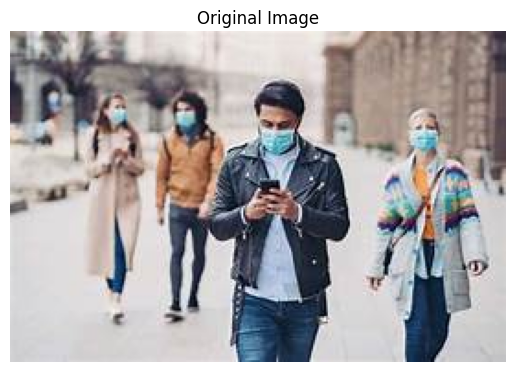

1/1 [==============================] - 2s 2s/step
🟢 MASK detected ✅ (Confidence: 0.99982363 )


In [9]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the pretrained model
model = load_model("../model/face_mask_detector.model")


# Step 2: Load and display a sample test image
img = cv2.imread("test_face.jpeg")  # Add any photo of a face and name it test_face.jpg
print("Image loaded:", img is not None)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Step 3: Preprocess the image for the model
img_resized = cv2.resize(img, (224, 224))
img_normalized = img_resized / 255.0
img_input = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

# Step 4: Get prediction
prediction = model.predict(img_input)[0][0]

# Step 5: Interpret the prediction
if prediction > 0.5:
    print("🟢 MASK detected ✅ (Confidence:", prediction, ")")
else:
    print("🔴 NO MASK detected ❌ (Confidence:", prediction, ")")


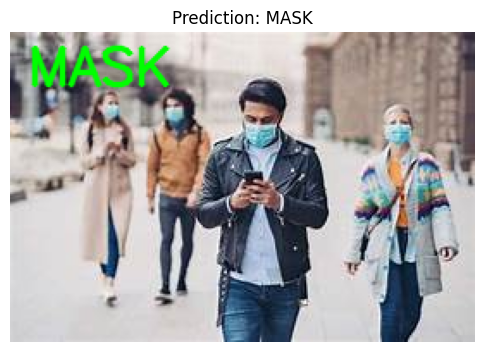

✅ Image saved as 'predicted_test_face.png'


In [11]:
# Step 6: Add label to the image
label = "MASK" if prediction > 0.5 else "NO MASK"
color = (0, 255, 0) if prediction > 0.5 else (255, 0, 0)

# Add label text to image (on a copy to preserve original)
img_copy = img.copy()
cv2.putText(img_copy, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
            1.0, color, 2, cv2.LINE_AA)

# Convert to RGB for matplotlib
img_rgb_labeled = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Display with matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb_labeled)
plt.axis('off')
plt.title(f"Prediction: {label}")
plt.show()

# Save the result
cv2.imwrite("predicted_test_face.png", img_copy)
print("✅ Image saved as 'predicted_test_face.png'")


In [12]:
# Load OpenCV's pre-trained Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert image to grayscale (required for Haar cascades)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Faces found: 1
1/1 [==============================] - 0s 93ms/step


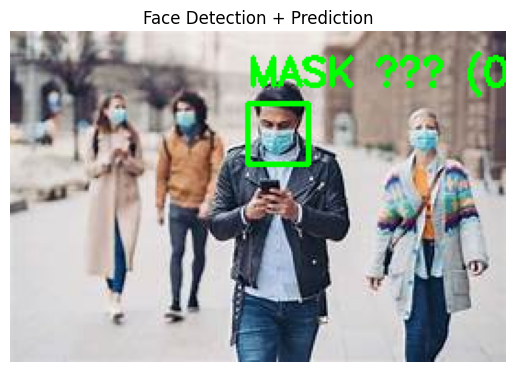

In [14]:
# Detect faces → returns a list of rectangles (x, y, w, h)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))

print("Faces found:", len(faces))

# Draw rectangles around faces and predict for each
for (x, y, w, h) in faces:
    # Crop the face region
    face = img[y:y+h, x:x+w]

    # Resize, normalize, and expand dimensions
    face_resized = cv2.resize(face, (224, 224)) / 255.0
    face_input = np.expand_dims(face_resized, axis=0)

    # Predict
    pred = model.predict(face_input)[0][0]
    label = "MASK ✅" if pred > 0.5 else "NO MASK ❌"
    confidence = round(pred if pred > 0.5 else 1 - pred, 3)

    # Draw bounding box + label
    color = (0, 255, 0) if pred > 0.5 else (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, f"{label} ({confidence})", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Show the image with predictions
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Face Detection + Prediction")
plt.show()

Faces found: 1
1/1 [==============================] - 0s 105ms/step


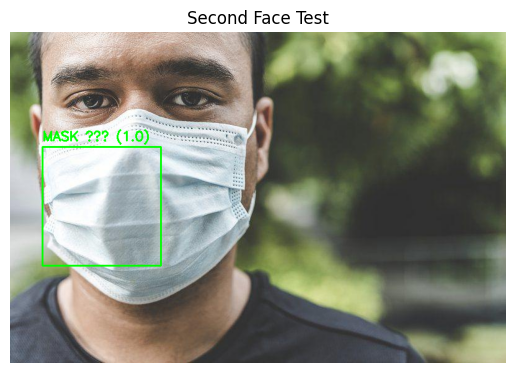

In [16]:
# Load a new image
img2 = cv2.imread("test_face_2.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect face
faces2 = face_cascade.detectMultiScale(gray2, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))
print("Faces found:", len(faces2))

# Predict on each face
for (x, y, w, h) in faces2:
    face = img2[y:y+h, x:x+w]
    face_resized = cv2.resize(face, (224, 224)) / 255.0
    face_input = np.expand_dims(face_resized, axis=0)
    pred = model.predict(face_input)[0][0]
    label = "MASK ✅" if pred > 0.5 else "NO MASK ❌"
    confidence = round(pred if pred > 0.5 else 1 - pred, 3)
    color = (0, 255, 0) if pred > 0.5 else (0, 0, 255)
    
    cv2.rectangle(img2, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img2, f"{label} ({confidence})", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

# Show result
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Second Face Test")
plt.show()
